In [20]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [21]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


In [22]:
training_data = np.load('TF_intro.npz')

In [23]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)
                            ])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=1)


Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 27.0380
Epoch 2/100
32/32 [==============================] - 0s 869us/step - loss: 4.5379
Epoch 3/100
32/32 [==============================] - 0s 852us/step - loss: 1.5082
Epoch 4/100
32/32 [==============================] - 0s 909us/step - loss: 0.6757
Epoch 5/100
32/32 [==============================] - 0s 881us/step - loss: 0.4572
Epoch 6/100
32/32 [==============================] - 0s 842us/step - loss: 0.3787
Epoch 7/100
32/32 [==============================] - 0s 835us/step - loss: 0.3690
Epoch 8/100
32/32 [==============================] - 0s 952us/step - loss: 0.3651
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3541
Epoch 10/100
32/32 [==============================] - 0s 936us/step - loss: 0.3643
Epoch 11/100
32/32 [==============================] - 0s 819us/step - loss: 0.3543
Epoch 12/100
32/32 [==============================] - 0s 812us/step - loss: 0.3611
Epoch 13/100
32/

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.layers[0].get_weights()

[array([[ 2.0338197],
        [-3.0032594]], dtype=float32),
 array([4.9951444], dtype=float32)]

In [8]:
bias = model.layers[0].get_weights()[1]
bias

array([4.9951444], dtype=float32)

In [9]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[ 12. ],
       [-18. ],
       [-24.1],
       [ -8.2],
       [ -5. ],
       [ 45.2],
       [-19.5],
       [ 32.9],
       [ 28.8],
       [ 35.8],
       [ 26.5],
       [ 24.9],
       [ 39. ],
       [-36.5],
       [ 40.4],
       [-19. ],
       [ 22.4],
       [ -6.5],
       [  5.4],
       [-18.8],
       [-21.8],
       [ -3.3],
       [  6.3],
       [ 37.7],
       [-12.7],
       [-24.2],
       [ 10. ],
       [ -2.2],
       [  3.1],
       [ 21.7],
       [ 19.3],
       [ 12.7],
       [ -6.3],
       [-12.2],
       [ -1.9],
       [-39.3],
       [ 20.8],
       [-20.6],
       [ 10.4],
       [-18.7],
       [ 44.7],
       [ -0.1],
       [  7.4],
       [ 34.9],
       [-13.1],
       [ -7.1],
       [ 16.5],
       [  2.8],
       [ -0.9],
       [  5.7],
       [-36.3],
       [  1.1],
       [  2.5],
       [ -7. ],
       [ 16.7],
       [-40.1],
       [ -2.7],
       [ -6. ],
       [  7.8],
       [ 17.9],
       [ 13.8],
       [-13.3],
       [

In [10]:
training_data['targets'].round(1)

array([[ 10.9],
       [-17.9],
       [-23.3],
       [ -7.9],
       [ -4.2],
       [ 43.9],
       [-19.8],
       [ 32.1],
       [ 29.4],
       [ 35. ],
       [ 25.6],
       [ 23.7],
       [ 39.2],
       [-35.9],
       [ 40.3],
       [-18.2],
       [ 22.8],
       [ -6.5],
       [  5.6],
       [-18.1],
       [-21.3],
       [ -4. ],
       [  7.3],
       [ 37.4],
       [-13.4],
       [-24.6],
       [  9.3],
       [ -1.4],
       [  2. ],
       [ 20.9],
       [ 19.3],
       [ 12.8],
       [ -6.3],
       [-12.2],
       [ -2.8],
       [-38.5],
       [ 20.2],
       [-20.5],
       [ 10.8],
       [-17.5],
       [ 45.1],
       [  0.3],
       [  7.4],
       [ 34.6],
       [-13.8],
       [ -7. ],
       [ 17. ],
       [  2.6],
       [ -0.5],
       [  5.3],
       [-35.2],
       [  1.7],
       [  1.4],
       [ -6.9],
       [ 16.4],
       [-40.2],
       [ -1.9],
       [ -6.3],
       [  8.4],
       [ 17.5],
       [ 13.3],
       [-12.3],
       [

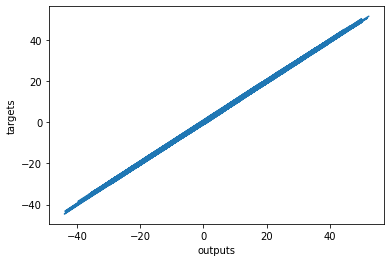

In [11]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()